### Importing the packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    make_scorer
)
import warnings
import time
warnings.filterwarnings("ignore")

### Loading the Dataset

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Data Analysis 

In [3]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 1025 rows and 14 columns


In [4]:
### check the info about the variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### Observations:
- The dataset has the numeric features

In [6]:
### checkk the basic stats about the data

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
### check for the missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Observations:
- There is no missing values in the data.

target
1    526
0    499
Name: count, dtype: int64


<Axes: xlabel='target'>

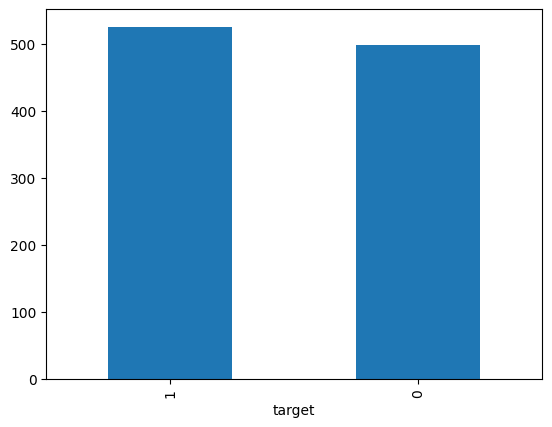

In [9]:
### check for the class distribution
print(df['target'].value_counts())
df['target'].value_counts().plot.bar()

#### Observation:
- The data is almost balanced

### Data Preprocessing

In [10]:
### seperating the X and y
X = df.drop(['target'],axis=1)
y = df['target']

In [11]:
### scaling the df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
### splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=42)

## Machine Learning Models

In [13]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    
    # Start time
    start_time = time.time()


    # predicting using the independent variables
    pred = model.predict(predictors)
    
    # predicting using the independent variables
    pred = model.predict(predictors)

    # End time
    end_time = time.time()

    # Calculate inference time
    inference_time = end_time - start_time

    
    
    #y_pred = model.predict(predictors)
    cm = confusion_matrix(target, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1, "Inference Time": inference_time},
        index=[0],
    )

    return df_perf

### Decision Tree

In [14]:
# Record start time
start_time = time.time()

# Define the classifier
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 50, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5, 7],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    dtree_estimator, parameters, n_jobs=-1
)  ## run grid search with n_jobs = -1



grid_obj = grid_obj.fit(X_train, y_train)  ## fit the grid_obj on the train data

# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time for hyperparameter tuning: {elapsed_time} seconds")

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_
print("The optimal Decision Tree")

dtree_estimator

Elapsed time for hyperparameter tuning: 2.8572020530700684 seconds
The optimal Decision Tree


DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=7,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

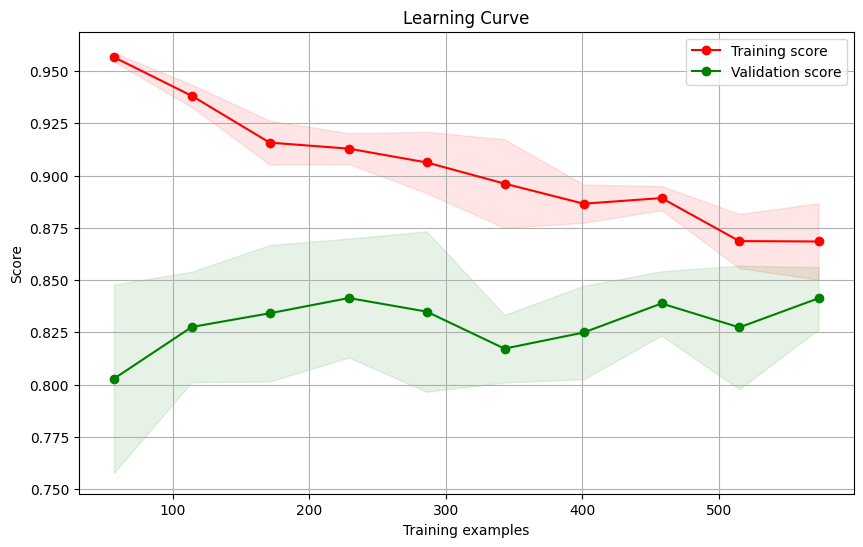

In [15]:
### using the optimal Dtree plot the Learning Curve
# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)
# Learning curve parameters
train_sizes, train_scores, test_scores = learning_curve(
    dtree_estimator, X_train, y_train, cv=5, scoring=scorer, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [16]:
### Evaluation of the optimal model on train and test data

,Accuracy,Recall,Precision,F1,Inference Time
0,0.846583,0.824934,0.876056,0.849727,0.001055


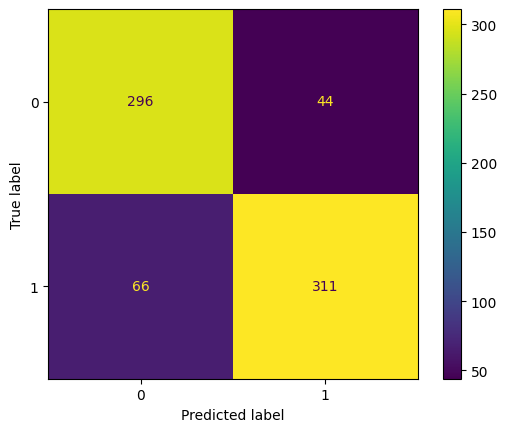

In [17]:
# check performance on train data
dtree_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)  
dtree_train_perf

,Accuracy,Recall,Precision,F1,Inference Time
0,0.772727,0.758389,0.768707,0.763514,0.001343


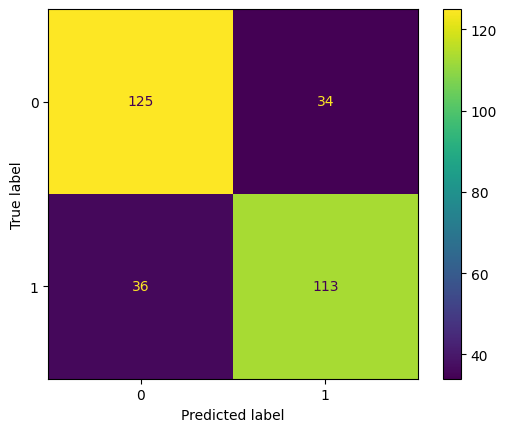

In [18]:
# check performance on test data
dtree_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)  
dtree_test_perf

### Multi Layered Perceptron

In [19]:
# Record start time
start_time = time.time()
# Define the classifier
mlp_estimator = MLPClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'hidden_layer_sizes': [(100,), (50, 50),(64,32,16,8)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam','lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter':[400,600,1000]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    mlp_estimator, parameters, n_jobs=-1
)  ## run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train, y_train)  ## fit the grid_obj on the train data

# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time for hyperparameter tuning: {elapsed_time} seconds")

# Set the clf to the best combination of parameters
mlp_estimator = grid_obj.best_estimator_

print("The optimal MLP Classifier")

mlp_estimator


/home/aamir_z/anaconda3/envs/fvgpu/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aamir_z/anaconda3/envs/fvgpu/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aamir_z/anaconda3/envs/fvgpu/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aamir_z/anaconda3/envs/fvgpu/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  war

/home/aamir_z/anaconda3/envs/fvgpu/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aamir_z/anaconda3/envs/fvgpu/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aamir_z/anaconda3/envs/fvgpu/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/aamir_z/anaconda3/envs/fvgpu/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  war

Elapsed time for hyperparameter tuning: 78.84537124633789 seconds
The optimal MLP Classifier


MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(64, 32, 16, 8),
              max_iter=400, random_state=1, solver='lbfgs')

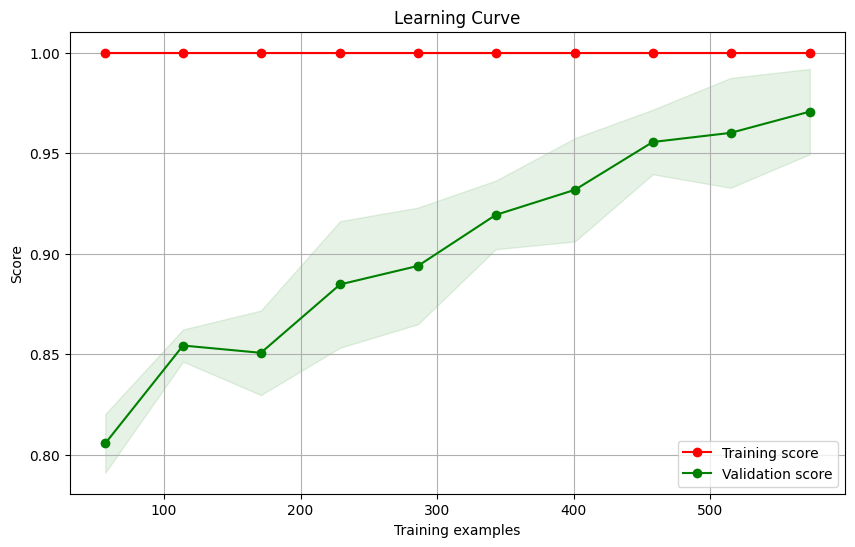

In [20]:
### using the optimal mlp plot the Learning Curve
# Fit the best algorithm to the data.
mlp_estimator.fit(X_train, y_train)
# Learning curve parameters
train_sizes, train_scores, test_scores = learning_curve(
    mlp_estimator, X_train, y_train, cv=5, scoring=scorer, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [21]:
### Evaluation of the optimal model on train and test data

,Accuracy,Recall,Precision,F1,Inference Time
0,1.0,1.0,1.0,1.0,0.00474


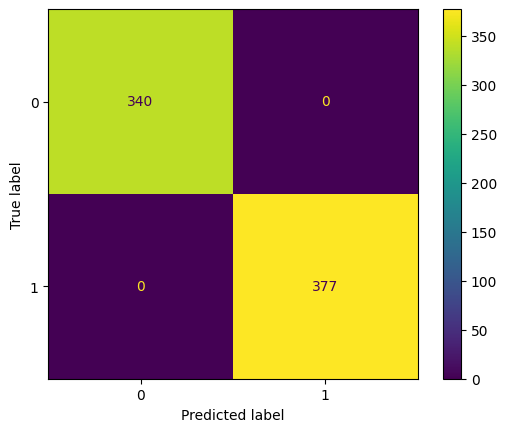

In [22]:
# check performance on train data
mlp_train_perf = model_performance_classification_sklearn(
    mlp_estimator, X_train, y_train
)  
mlp_train_perf

,Accuracy,Recall,Precision,F1,Inference Time
0,0.970779,0.939597,1.0,0.968858,0.008254


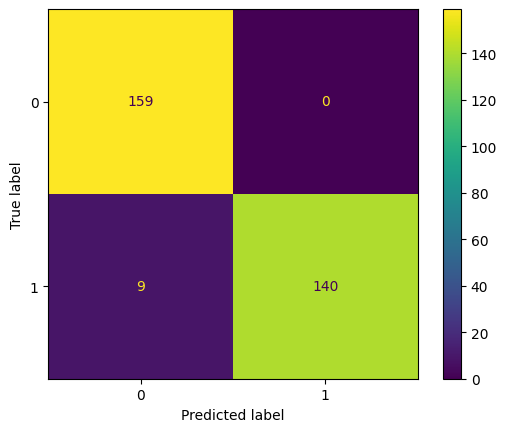

In [23]:
# check performance on test data
mlp_test_perf = model_performance_classification_sklearn(
    mlp_estimator, X_test, y_test
)  
mlp_test_perf

### ADABOOST Classifier

In [24]:
# Record start time
start_time = time.time()
# Choose the type of classifier.
abc_estimator = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 151, 10),
    "learning_rate": np.arange(0.1, 0.5, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    abc_estimator, parameters, n_jobs=-1
)  ##  run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train)  ##  fit the grid_obj on train data

# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time for hyperparameter tuning: {elapsed_time} seconds")

# Set the clf to the best combination of parameters
abc_estimator = grid_obj.best_estimator_

print("The optimal Boosting Classifier")

abc_estimator

Elapsed time for hyperparameter tuning: 23.75892925262451 seconds
The optimal Boosting Classifier


AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=2,
                                                    random_state=1),
                   learning_rate=0.4, n_estimators=140, random_state=1)

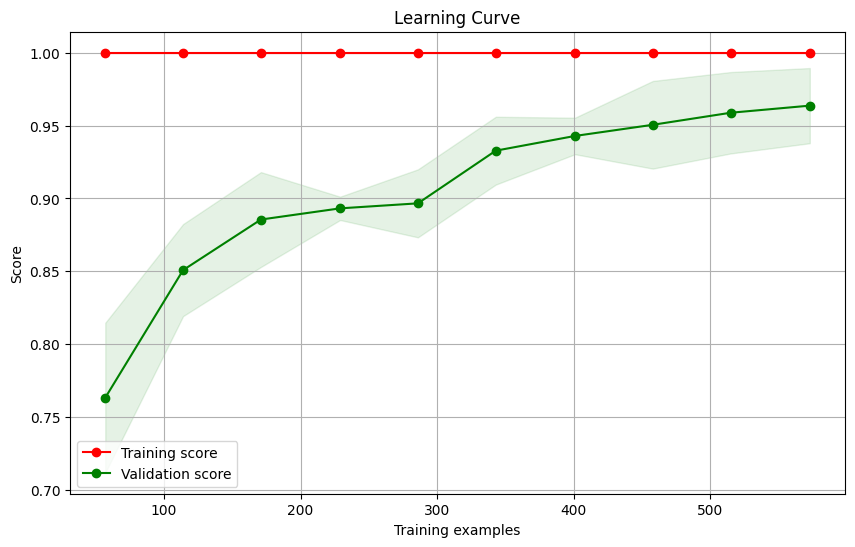

In [25]:
### using the optimal mlp plot the Learning Curve
# Fit the best algorithm to the data.
abc_estimator.fit(X_train, y_train)
# Learning curve parameters
train_sizes, train_scores, test_scores = learning_curve(
    abc_estimator, X_train, y_train, cv=5, scoring=scorer, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [26]:
### Evaluation of the optimal model on train and test data

,Accuracy,Recall,Precision,F1,Inference Time
0,1.0,1.0,1.0,1.0,0.073518


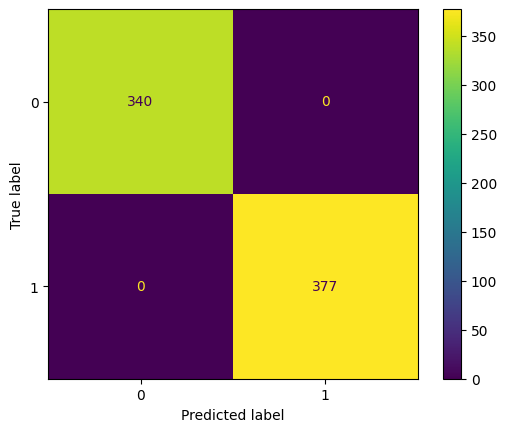

In [27]:
# check performance on train data
abc_train_perf = model_performance_classification_sklearn(
    abc_estimator, X_train, y_train
)  
abc_train_perf

,Accuracy,Recall,Precision,F1,Inference Time
0,0.970779,0.939597,1.0,0.968858,0.064658


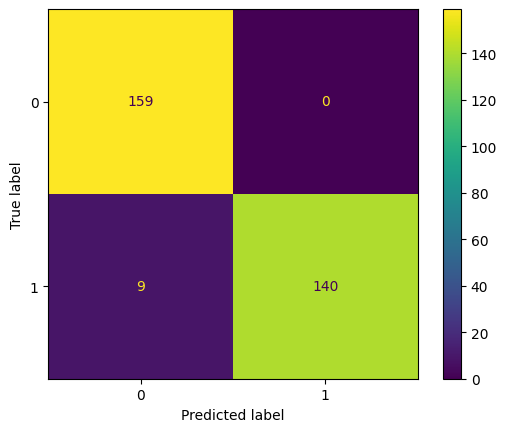

In [28]:
# check performance on test data
abc_test_perf = model_performance_classification_sklearn(
    abc_estimator, X_test, y_test
)  
abc_test_perf

### SVM Classifier

In [29]:
# Record start time
start_time = time.time()
# Choose the type of classifier.
svm_estimator = SVC(random_state=1)

# Grid of parameters to choose from
parameters = {
    'C': [0.1, 1, 10,50, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5]
}


# Type of scoring used to compare parameter  combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    svm_estimator, parameters, n_jobs=-1
)  ##  run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train)  ##  fit the grid_obj on train data

# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time for hyperparameter tuning: {elapsed_time} seconds")

# Set the clf to the best combination of parameters
svm_estimator = grid_obj.best_estimator_

print("The optimal SVM Classifier")

svm_estimator

Elapsed time for hyperparameter tuning: 14.859514474868774 seconds
The optimal SVM Classifier


SVC(C=50, coef0=0.1, kernel='poly', random_state=1)

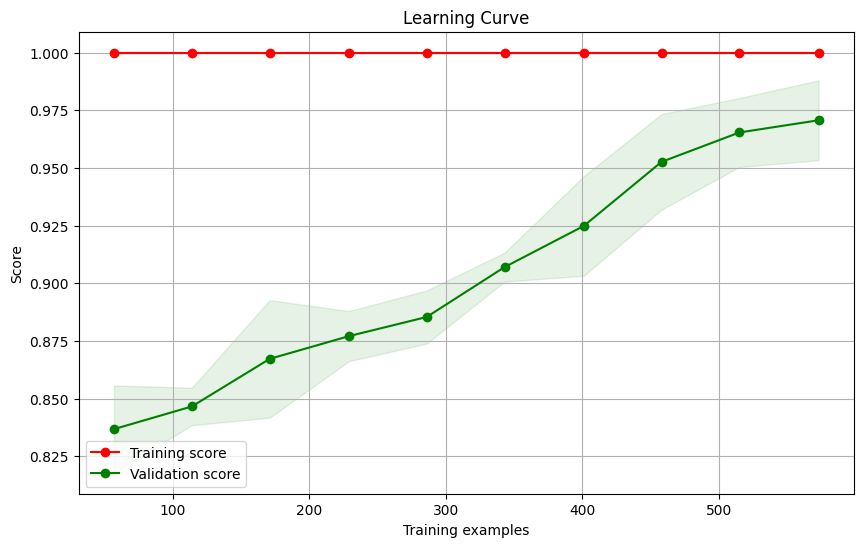

In [30]:
### using the optimal mlp plot the Learning Curve
# Fit the best algorithm to the data.
svm_estimator.fit(X_train, y_train)
# Learning curve parameters
train_sizes, train_scores, test_scores = learning_curve(
    svm_estimator, X_train, y_train, cv=5, scoring=scorer, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [31]:
### Evaluation of the optimal model on train and test data

,Accuracy,Recall,Precision,F1,Inference Time
0,1.0,1.0,1.0,1.0,0.01036


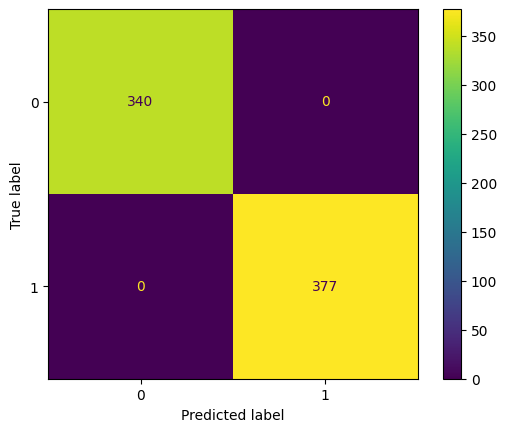

In [32]:
# check performance on train data
svm_train_perf = model_performance_classification_sklearn(
    svm_estimator, X_train, y_train
)  
svm_train_perf

,Accuracy,Recall,Precision,F1,Inference Time
0,0.970779,0.939597,1.0,0.968858,0.004387


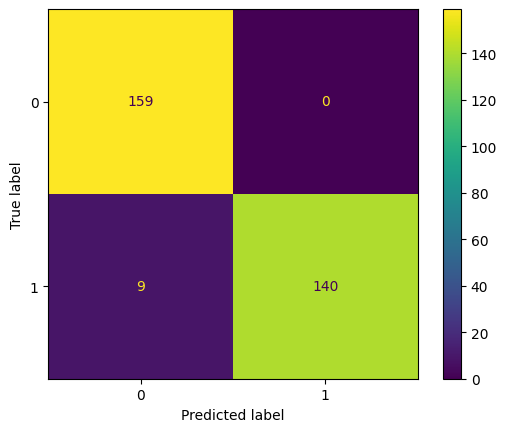

In [33]:
# check performance on test data
svm_test_perf = model_performance_classification_sklearn(
    svm_estimator, X_test, y_test
)  
svm_test_perf

### KNN Classifier

In [34]:
# Record start time
start_time = time.time()
# Choose the type of classifier.
knn_estimator = KNeighborsClassifier()

# Grid of parameters to choose from
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19 ],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}


# Type of scoring used to compare parameter  combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    knn_estimator, parameters, n_jobs=-1
)  ##  run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train)  ##  fit the grid_obj on train data

# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time for hyperparameter tuning: {elapsed_time} seconds")
# Set the clf to the best combination of parameters
knn_estimator = grid_obj.best_estimator_

print("The optimal KNN Classifier")

knn_estimator

Elapsed time for hyperparameter tuning: 0.6360459327697754 seconds
The optimal KNN Classifier


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

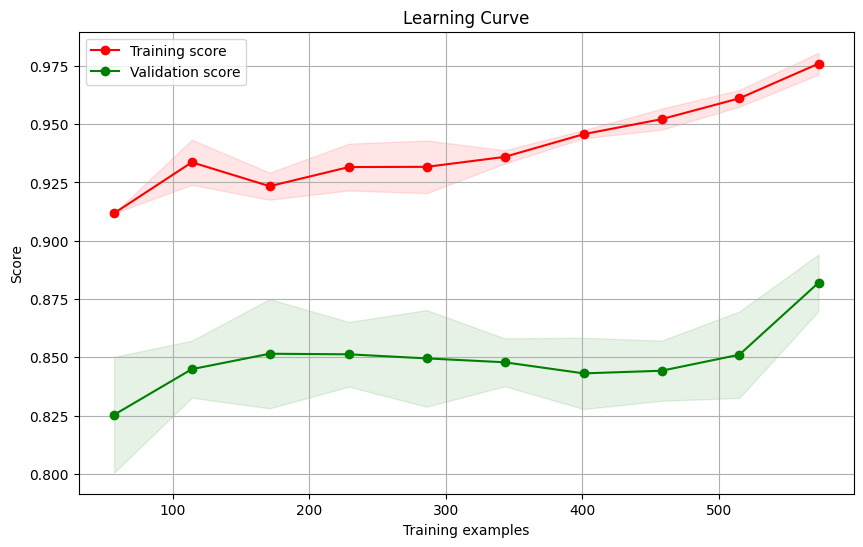

In [35]:
### using the optimal mlp plot the Learning Curve
# Fit the best algorithm to the data.
knn_estimator.fit(X_train, y_train)
# Learning curve parameters
train_sizes, train_scores, test_scores = learning_curve(
    knn_estimator, X_train, y_train, cv=5, scoring=scorer, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [36]:
### Evaluation of the optimal model on train and test data

,Accuracy,Recall,Precision,F1,Inference Time
0,0.991632,0.994695,0.989446,0.992063,0.080284


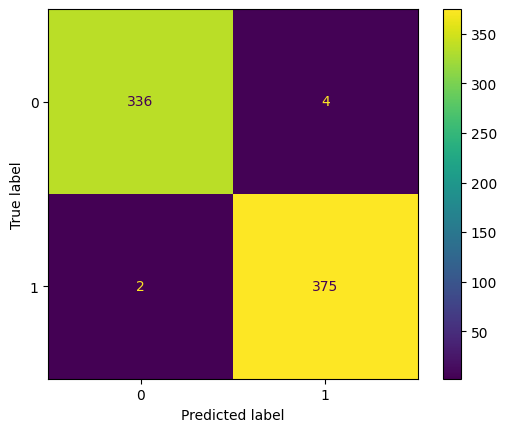

In [37]:
# check performance on train data
knn_train_perf = model_performance_classification_sklearn(
    knn_estimator, X_train, y_train
)  
knn_train_perf

,Accuracy,Recall,Precision,F1,Inference Time
0,0.935065,0.932886,0.932886,0.932886,0.047371


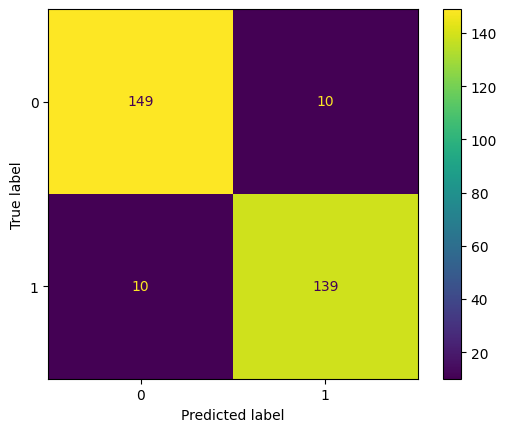

In [38]:
# check performance on test data
knn_test_perf = model_performance_classification_sklearn(
    knn_estimator, X_test, y_test
)  
knn_test_perf

### Comparison of Models

In [39]:
# training performance comparison

models_train_comp_df = pd.concat(
    [knn_train_perf.T, abc_train_perf.T, dtree_train_perf.T , mlp_train_perf.T , svm_train_perf.T], axis=1,
)
models_train_comp_df.columns = [
    "KNN ",
    "Boosting",
    "Decision Tree ",
    "Neural Network",
    "SVM",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,KNN,Boosting,Decision Tree,Neural Network,SVM
Accuracy,0.991632,1.000000,0.846583,1.00000,1.00000
Recall,0.994695,1.000000,0.824934,1.00000,1.00000
Precision,0.989446,1.000000,0.876056,1.00000,1.00000
F1,0.992063,1.000000,0.849727,1.00000,1.00000
Inference Time,0.080284,0.073518,0.001055,0.00474,0.01036


In [40]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [knn_test_perf.T, abc_test_perf.T, dtree_test_perf.T , mlp_test_perf.T , svm_test_perf.T], axis=1,
)
models_test_comp_df.columns = [
    "KNN ",
    "Boosting",
    "Decision Tree ",
    "Neural Network",
    "SVM",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,KNN,Boosting,Decision Tree,Neural Network,SVM
Accuracy,0.935065,0.970779,0.772727,0.970779,0.970779
Recall,0.932886,0.939597,0.758389,0.939597,0.939597
Precision,0.932886,1.000000,0.768707,1.000000,1.000000
F1,0.932886,0.968858,0.763514,0.968858,0.968858
Inference Time,0.047371,0.064658,0.001343,0.008254,0.004387
